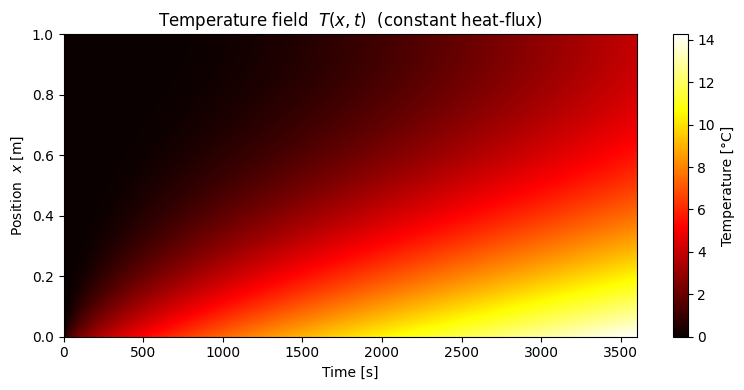

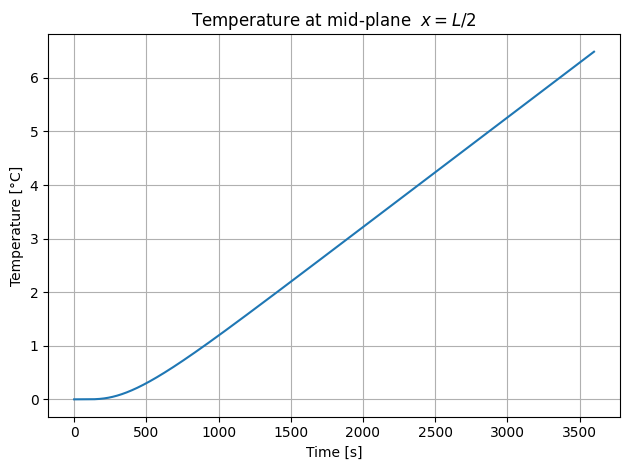

In [ ]:
# ╔══════════════════════════════════════════════════════════════════════╗
# ║  Constant heat-flux 1-D slab (paper Eq. 11) – generate + visualise   ║
# ╚══════════════════════════════════════════════════════════════════════╝
import torch, math
import matplotlib.pyplot as plt

# --- physical & grid parameters -----------------------------------------
L      = 1.0       # wall thickness [m]
dx     = 1e-3      # spatial step   [m]   → Nx ≈ 1001
t_end  = 3600.0    # total time     [s]
dt     = 1.0       # time step      [s]   → Nt ≈ 3601
alpha  = 9.7e-5    # thermal diffusivity   [m²/s]
k      = 237.0     # conductivity         [W/(m·K)]
q0     = 5_000.0   # constant surface flux [W/m²]
N_terms = 800      # series truncation (good to ~1e-8 at this grid)

# --- coordinate tensors -------------------------------------------------
x = torch.arange(0.0, L + 1e-12, dx)          # (Nx,)
t = torch.arange(0.0, t_end + 1e-12, dt)      # (Nt,)
Nx, Nt = x.numel(), t.numel()

# --- Eq. (11): base term  (α q0 / kL) t  -------------------------------
T = (alpha * q0 / (k * L)) * t          # shape (Nt,)
T = T.expand(Nx, Nt).clone()            # broadcast to grid

# --- cosine series  Σ cos(γ_n x)[1−e^{-α γ² t}]/γ²  --------------------
n      = torch.arange(1, N_terms + 1)
gamma  = n * math.pi / L                                   # γ_n = nπ/L
f_t    = (1.0 - torch.exp(-alpha * (gamma ** 2).unsqueeze(1) * t)) \
         / (gamma ** 2).unsqueeze(1)                       # (N_terms, Nt)
cos_x  = torch.cos(gamma.unsqueeze(1) * x.unsqueeze(0))    # (N_terms, Nx)
T     += (2 * q0) / (k * L) * cos_x.T @ f_t                # (Nx, Nt)

# ── 1) Heat-map ----------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.imshow(T, aspect='auto', origin='lower',
           extent=[t.min(), t.max(), x.min(), x.max()],
           cmap='hot')
plt.xlabel('Time [s]')
plt.ylabel('Position  $x$ [m]')
plt.title('Temperature field  $T(x,t)$  (constant heat-flux)')
plt.colorbar(label='Temperature [°C]')
plt.tight_layout()
plt.show()

# ── 2) Mid-plane time-history -------------------------------------------
mid = Nx // 2          # index closest to x = L/2
plt.figure()
plt.plot(t, T[mid])
plt.xlabel('Time [s]')
plt.ylabel('Temperature [°C]')
plt.title('Temperature at mid-plane  $x=L/2$')
plt.grid(True)
plt.tight_layout()
plt.show()


tensor([[1],
        [2],
        [3],
        [4]])